<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-3-candywal/blob/main/Copy_of_DATA_301_Lab_2B_Evidence_of_Discrimination%3F_Noah_Cain_Anshul_Khandelwal_Triet_Tran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [ ]:
import pandas as pd
df = pd.read_csv("https://dlsun.github.io/pods/data/ca_dds_expenditures.csv")
df

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
997,99718,13 to 17,17,Female,3673,Multi Race
998,99791,6 to 12,10,Male,3638,Hispanic


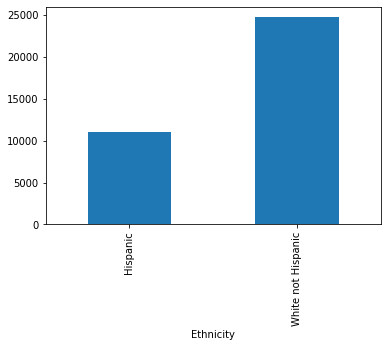

In [ ]:
df_wh = df[(df["Ethnicity"]=="White not Hispanic") | (df["Ethnicity"]=="Hispanic")]
df_wh.groupby("Ethnicity")["Expenditures"].mean().plot.bar()

**YOUR EXPLANATION HERE**

White peope who are not Hispanic people have significantly larger mean expenditures. 

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

In [ ]:
# YOUR CODE HERE
avgexp = df_wh.groupby(["Ethnicity", "Age Cohort"])["Expenditures"].mean()
avgexp = avgexp.unstack("Ethnicity")
avgexp

Ethnicity,Hispanic,White not Hispanic
Age Cohort,,
0 to 5,1393.204545,1366.900000
13 to 17,3955.281553,3904.358209
18 to 21,9959.846154,10133.057971
22 to 50,40924.116279,40187.624060
51+,55585.000000,52670.424242
6 to 12,2312.186813,2052.260870


In [ ]:
import altair as alt

chart = alt.Chart(df_wh).mark_bar().encode(
    x='Ethnicity',
    y='average(Expenditures):Q',
    color='Ethnicity',
    column='Age Cohort'

)

chart

alt.Chart(...)

**YOUR EXPLANATION HERE**

Each Column compares the Average Expenditure for each Ethinicity and Age Cohort. It looks like for every Age Cohort, Hispanic people spend more than white people which is weird because the mean expenditure is much less. This is an example of Simpson's Paradox and will be explored in the next question. 

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

In [ ]:
# YOUR CODE HERE (although you may want to add more code cells)
import altair as alt

chart = alt.Chart(df_wh).mark_area(
    opacity=0.3,
).encode(
    alt.X('Age:Q', bin=alt.Bin(maxbins=100), title='Age'),
    alt.Y('count()', stack=None, title='Density'),
    alt.Color('Ethnicity:N', scale=alt.Scale(range=['red', 'blue']))
)
chart

alt.Chart(...)

In [ ]:
import altair as alt

chart = alt.Chart(df_wh).mark_bar().encode(
    x='Age Cohort',
    y='average(Expenditures):Q',

)

chart

alt.Chart(...)

**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**

There's a lot more old white people, and old people spend more than young people, so the overall average leans towards white people despite being the opposite. 

The second graph shoes that older people spend a significant amount more than younger people. 

As you can see from the first chart, there are a significantly larger number of younger Hispanics, and there are more elder White people. This pushes the mean up by a lot and is why in aggregate the result is opposite.  

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.